<a href="https://colab.research.google.com/github/jfarhat006/GtA-data-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem : As a security/defence analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?**

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path = '/content/drive/MyDrive/'

In [5]:
database = pd.read_csv(path + 'Global Terrorism Data.csv', encoding='latin-1')
database.head() 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [6]:
database.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**Note:** Since it contains 135 columns. They have a huge proportion in dataset and Learning them doesn't make any sense. So, we will rename the columns name for better understaning and then we will only extract necessary columns.


In [8]:
database.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [10]:
database=database[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
database.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

# **Exploratory Data Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7acecbd1d0>,
      dtype=object)

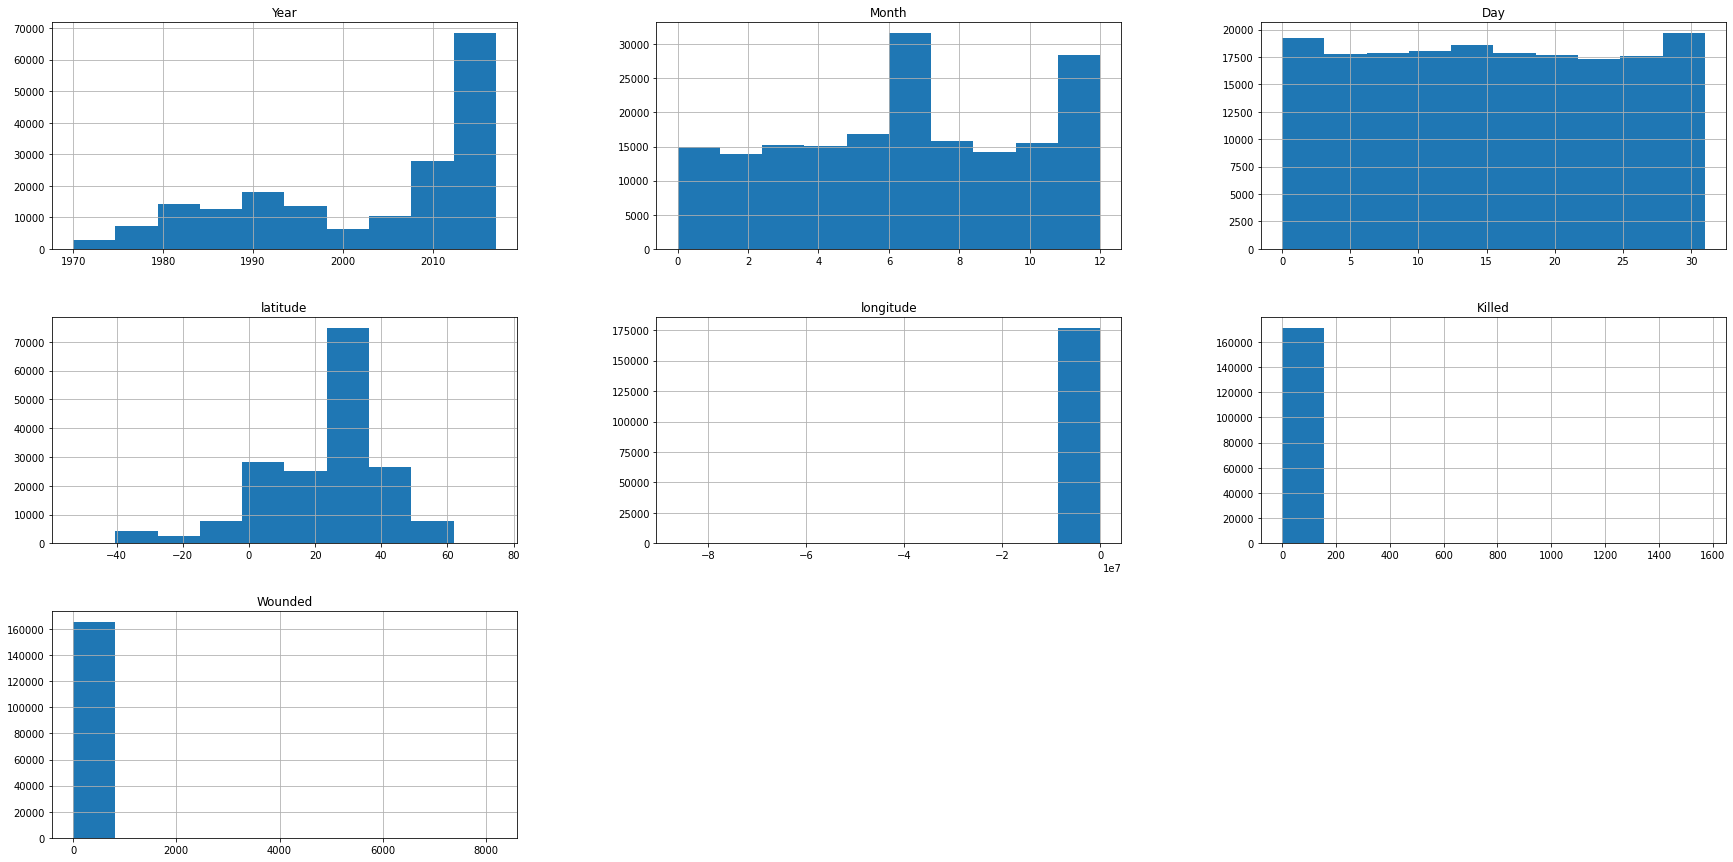

In [13]:
database.hist(figsize=(30,15))

In [14]:
database.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

# **Correlation Analysis-**

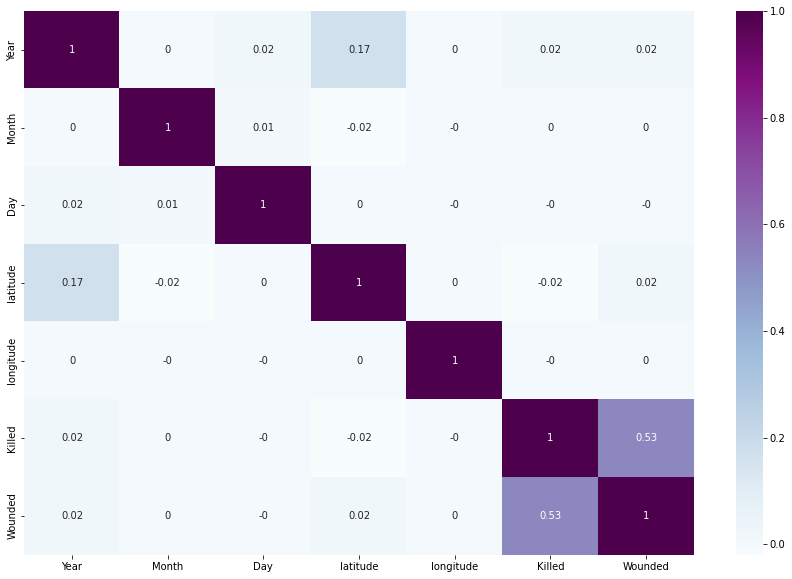

In [20]:
plt.figure(figsize=(15,10))
#This shows how much related is one parameter to the other in the dataset. 
sns.heatmap(np.round(database.corr(),2),annot=True, cmap='BuPu')

# Terrorist Activities by Region in each Year through Area Plot

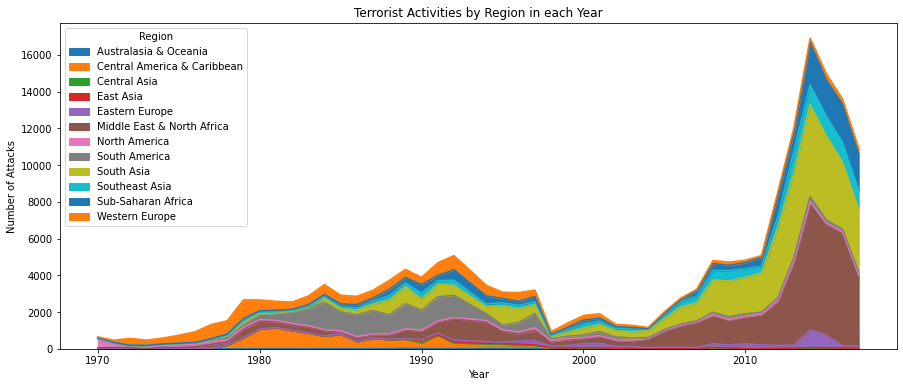

In [22]:
pd.crosstab(database.Year, database.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

# Number of Terrorist Activities each Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


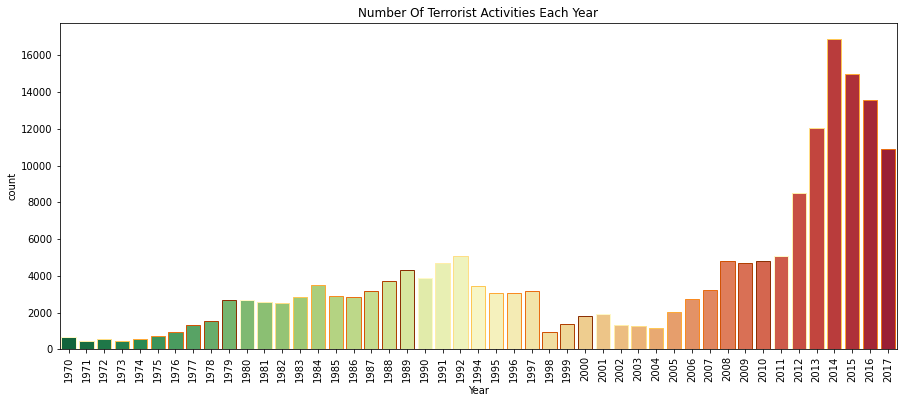

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(database.Year,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# Number of attack were there in 1970 & 2017 and Also find percentage the attacks have increased.

In [24]:
Year=database.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


# The number of casualities corresponding to the killed people in each country for each year.

In [26]:
px.scatter(database,database.Wounded,database.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='AttackType',
           range_color=[0,1],labels={'Killed':'Deaths','Wounded':'Casualities'},
           title='Number of casualities vs Killed people in each country for each year')

# Methods of attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



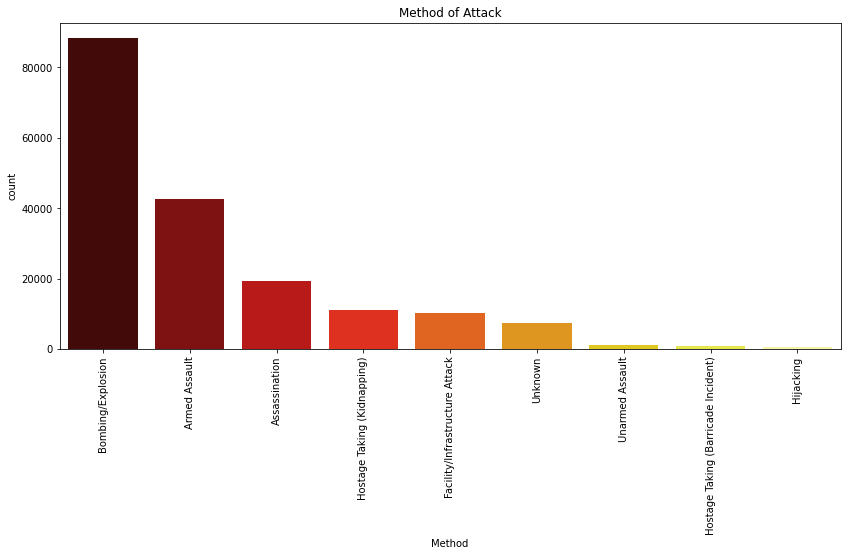

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(database['AttackType'],order=database['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

# **Type of target**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



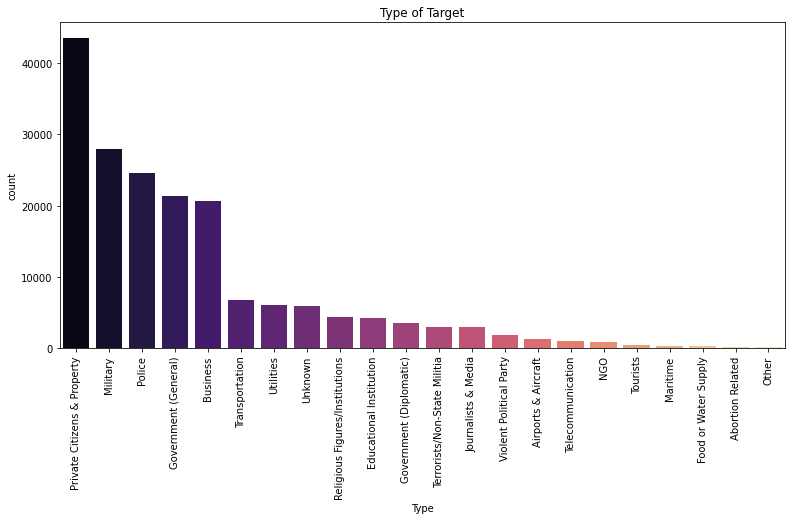

In [28]:
plt.figure(figsize=(13,6))
sns.countplot(database['Target_type'],order=database['Target_type'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

# **Total number of terrorist attack in each country and regions using barplot**

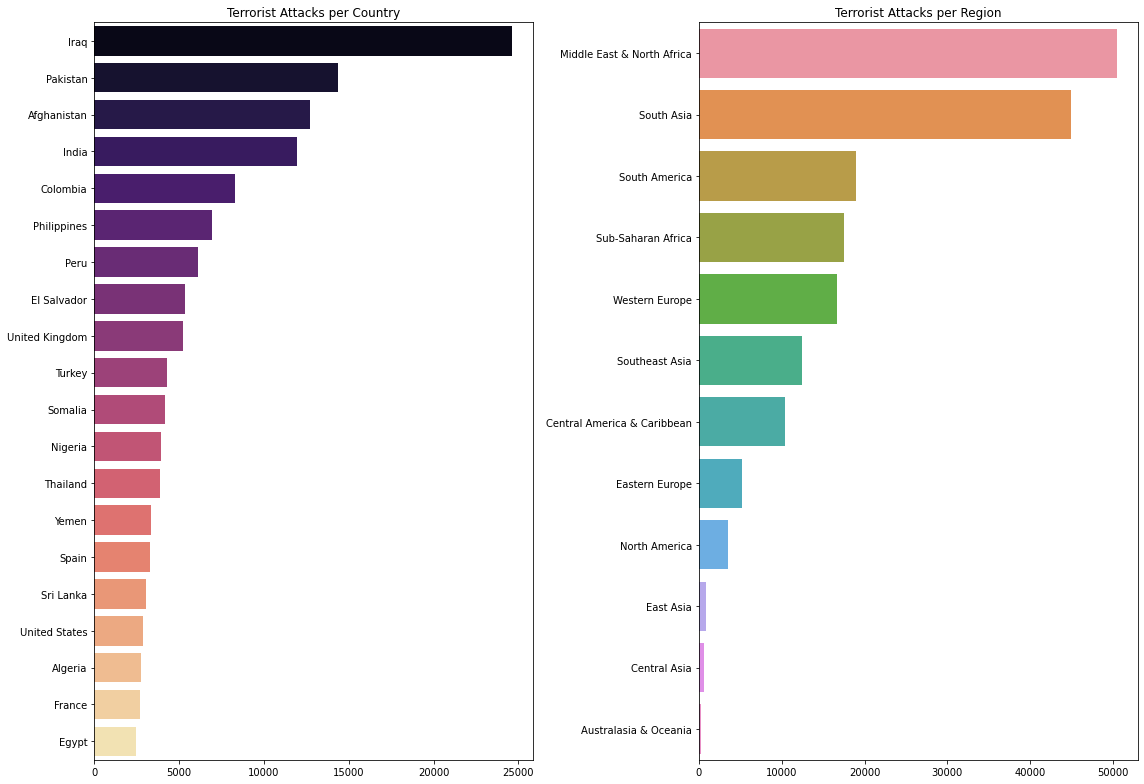

In [29]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = database['Country'].value_counts()[:20].values, y = database['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=database['Region'].value_counts().values,y=database['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

# Terrorist Activities by Region in each Year through Area Plot

We will first create a new dataframe which contains the total count of attacks for each country in order to use it as a colour bar.

In [30]:
terr=database.groupby(['Country'],as_index=False).count()

In [31]:
fig=px.choropleth(terr,locations='Country',locationmode='country names',
                  color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

# Country suffered the maximum attacks(state the number) and country suffered minimum attacks(state the number)


In [32]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [33]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


# Now let us check out which terrorist organizations have carried out their operations in each country.

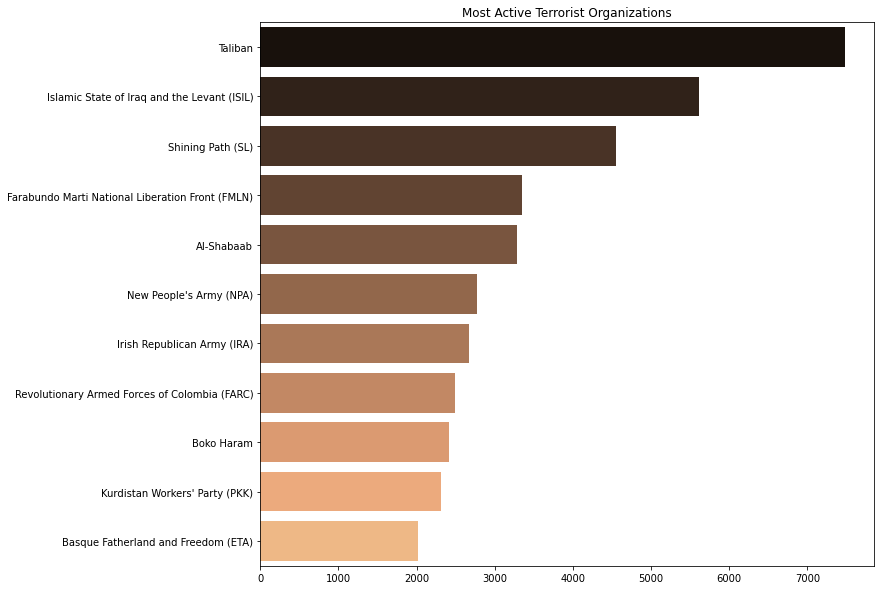

In [35]:
plt.subplots(figsize=(11,10))
sns.barplot(y=database['Group'].value_counts()[1:12].index,x=database['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()


# Now we will look closer at trend Before and after the War on Terror.

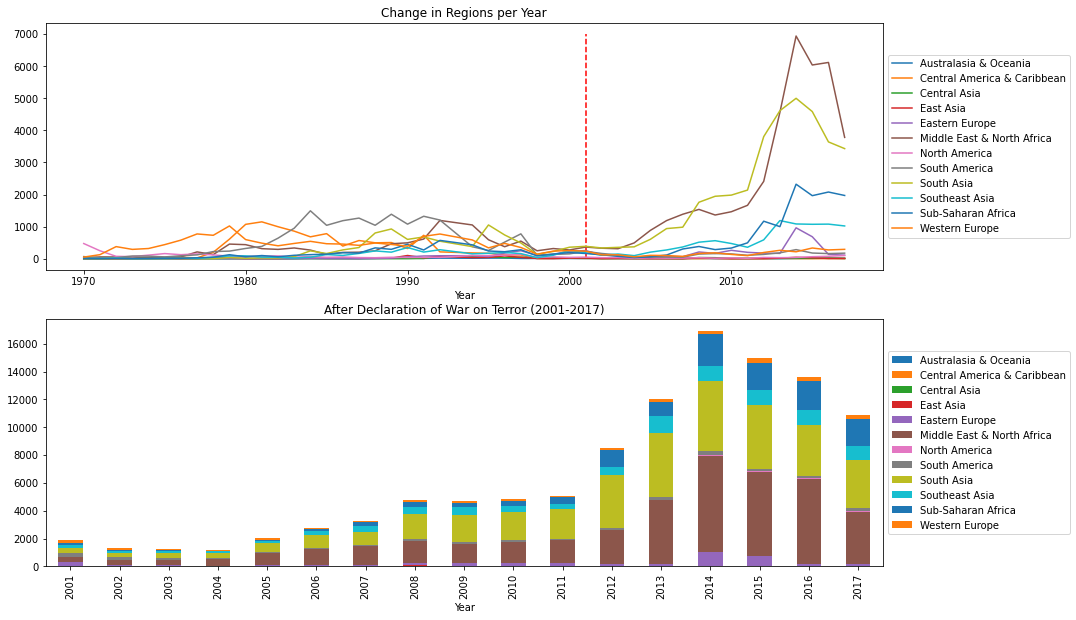

In [37]:
data_after = database[database['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(database.Year,database.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

*From the first plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.*




# **Insight-**

1. Year wise attack:

 *Attacks*

*  most number of attacks: 16903 in 2014
*  least number of attacks: 471 in 1971

  *Casualties*

*   most number of casulties:85618 in 2014
*   least number of casulties :255 in 1971

  *Killed*

*   most number of people killed:44490 in 2014
*   least number of people killed:173 in 1971
  
  *Wounded*

*   most number of people wounded:44043 in 2015
*   least number of people wounded:82 in 1971













